In [30]:
import os
from os.path import expanduser
import socket
import sys


# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
if running_system == systemLOCAL:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"Documents","projects", "awi-models")
elif running_system == systemHLRN:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"awi-models")
else:
    print 'please configure your local machine : type socket.gethostname()'
print "working directory set to", wd_path
os.chdir(wd_path)
sys.path.append("codes/modules")
#########################################

computer =  blogin1
working directory set to /home/hbkoziel/awi-models


In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from pylab import *
from load_mesh_data_new import *
import numpy as np
import datetime as dt
from PiecewiseNorm import PiecewiseNorm
from netCDF4 import Dataset
import colormaps as cmaps
from matplotlib.colors import ListedColormap

In [32]:
# PLOT CONFIGURATION #

# load colormaps #
cmap = plt.get_cmap('RdBu_r')
# figure export 
export_plot = True
# figure export definition
dpicnt=150
# type of plot
global_plot = True
arctic_plot = True
# choose simulation
runid='Arc12'
# choose date
first_year = 1990
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
months =np.linspace(0,11,12).astype(int)
# choose depth
get3d = False
# load the given biological tracer #
var_id = 'tr18' #DSi

########################

# AUTOMATIC DEFINITION OF PATHS
resultpath = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/'
savepath    = wd_path+'/figures/'+runid+'/'
meshpath    = wd_path+'/data/mesh/meshArc4.5/'

# Create figure directory if it does not exist
if os.path.exists(savepath) == False:
    try:
        os.mkdir(savepath)
        print ("Creation of the directory %s successfull" % savepath)
    except OSError:
        print ("Creation of the directory %s failed" % savepath)
else:
    print ("directory %s already existing" % savepath)

directory /home/hbkoziel/awi-models/figures/Arc12/ already existing


In [33]:
mesh = fesom_mesh(meshpath, get3d = get3d)
#mesh = load_mesh(meshpath)

Load 2d part of the grid in 3 second(s)


In [34]:
# initlialyze
DSI2D = np.empty((len(years),mesh.n2d))
DATE = np.empty((len(years)))

# loop over years
for ind in range(0,len(years)):
     print years[ind]
     ncfile = resultpath+runid+'.'+str(years[ind])+'.oce.mean.nc'
     f      = Dataset(ncfile, 'r')
     #din    = f.variables[var_id][11]
     if years[ind] < 2000:
         dsi    = f.variables[var_id][0:3,0:mesh.n2d].mean(axis=0)
     else:
         dsi    = f.variables[var_id][0:45,0:mesh.n2d].mean(axis=0)
     
     #date    = f.variables['time'][45]
     #nc_attrs, nc_dims, nc_vars = ncdump(nc_file)
     #date   = f.dimensions['T'].size
     DSI2D[ind,:]=dsi[:]
     #DATE[ind]=date

1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


In [35]:
result_fit = np.ma.polyfit(years,DSI2D,1)

In [36]:
data2 = result_fit[0,:]

ftriplot, number of dummy points: 0


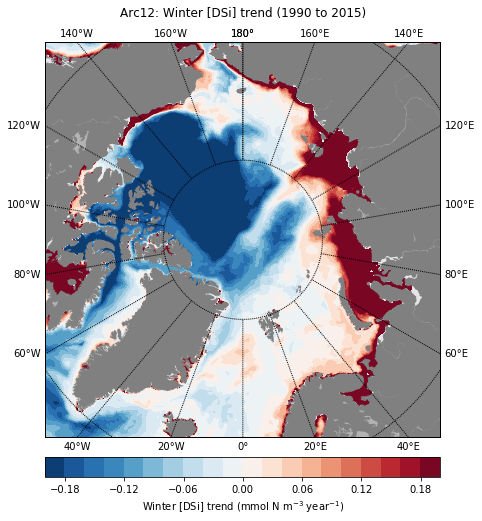

In [37]:
if arctic_plot:
    contours = [-0.2, 0.2, 0.02]
    contours = np.arange(contours[0], contours[1]+contours[2], contours[2])
    fig = plt.figure(figsize=(8,8), facecolor='w', edgecolor='k')
    elem2=mesh.elem#[mesh.no_cyclic_elem,:]
    d=data2[elem2].mean(axis=1)
    k = [i for (i, val) in enumerate(d) if not np.isnan(val)]
    elem2=elem2[k,:]
    print 'ftriplot, number of dummy points:', len(d)-len(k)		
    map = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
    x, y = map(mesh.x2, mesh.y2)
    #map.drawcoastlines()
    plabels=[False,False,False,False]
    mlabels=[True,True,True,True]    
    map.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
    map.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
    map.drawmapboundary(fill_color='0.9')
    map.fillcontinents(color='.5',lake_color='.7')
    eps=(contours.max()-contours.min())/100.
    data2[data2<=contours.min()]=contours.min()+eps
    data2[data2>=contours.max()]=contours.max()-eps
    im=plt.tricontourf(x, y, elem2, data2, levels=contours, cmap=cmap, norm=PiecewiseNorm(contours))
    label = runid+': Winter [DSi] trend ('+str(years[0])+' to '+str(years[len(years)-1])+')'
    plt.title(label,y=1.05)
    cbar=map.colorbar(im,"bottom", size="5%", pad="5%")
    cbar.set_label(r'Winter [DSi] trend (mmol N m$^{-3}$ year$^{-1}$)')
    
    if export_plot == True:
        plt.savefig(savepath+'DSispatialArc_trend_'+str(years[ind])+'.png', dpi = dpicnt, bbox_inches='tight') 
        
plt.show() 

ftriplot, number of dummy points: 0


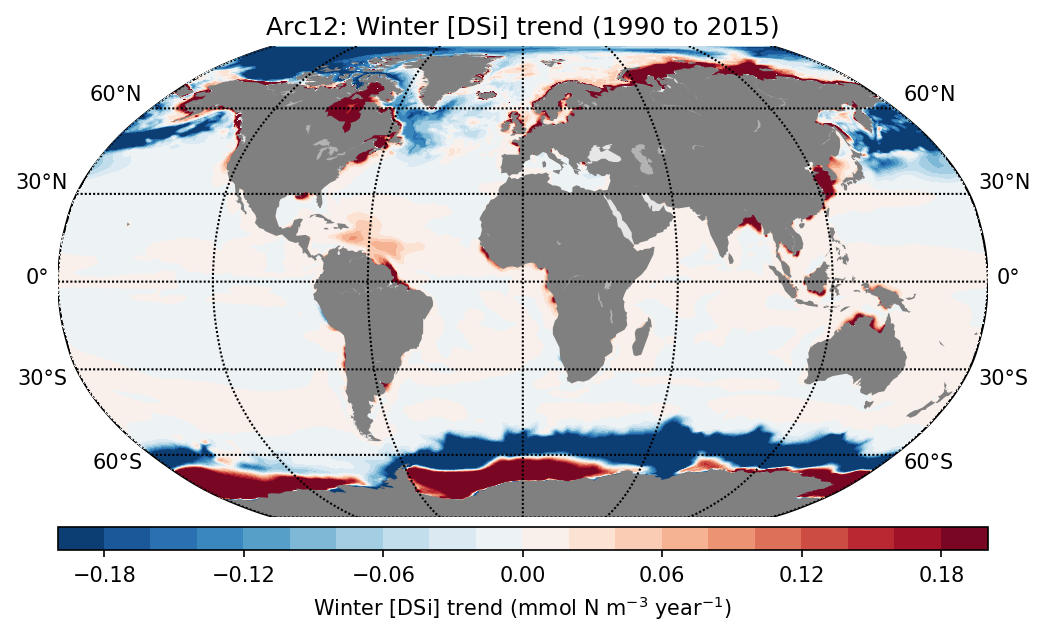

In [38]:
if global_plot:
    contours = [-0.2, 0.2, 0.02]
    contours = np.arange(contours[0], contours[1]+contours[2], contours[2])
    fig = plt.figure(num=1, figsize=(8, 8), dpi=dpicnt, facecolor='w', edgecolor='k')
    elem2=mesh.elem[mesh.no_cyclic_elem,:]
    d=data2[elem2].mean(axis=1)
    k = [i for (i, val) in enumerate(d) if not np.isnan(val)]
    elem2=elem2[k,:]
    print 'ftriplot, number of dummy points:', len(d)-len(k)    
    map = Basemap(projection='robin',lon_0=0) 
    x, y = map(mesh.x2, mesh.y2)
    map.drawmapboundary(fill_color='0.9')
    map.fillcontinents(color='.5',lake_color='.7')
    #map.drawcoastlines()
    mlabels=[False,False,False,False]
    plabels=[True,True,True,True]  
    map.drawparallels(np.arange(-90,90,30),labels=plabels) #[1,0,0,0]
    map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=mlabels) #[0,0,0,1]
    #eps=(contours.max()-contours.min())/50.
    #data2[data2<=contours.min()]=contours.min()+eps
    #data2[data2>=contours.max()]=contours.max()-eps
    im=plt.tricontourf(x, y, elem2, data2, levels=contours, cmap=cmap, norm=PiecewiseNorm(contours))
    label = runid+': Winter [DSi] trend ('+str(years[0])+' to '+str(years[len(years)-1])+')'
    plt.title(label)
    plt.clim(0,30)
    cbar=map.colorbar(im,"bottom", size="5%", pad="2%")
    cbar.set_label(r'Winter [DSi] trend (mmol N m$^{-3}$ year$^{-1}$)')
    
    
    if export_plot == True:
        plt.savefig(savepath+'DSispatial_trend'+str(years[ind])+'_World.png', dpi = dpicnt, bbox_inches='tight')
        
plt.show()  